<h><b>Customer Segmentation Using Unsupervised Learning</h></b>
<p><b>Objective:</b>
Cluster customers based on spending habits and propose marketing strategies tailored to each
segment.</
p>

<h><b>Module 1 : Data Cleaning and Pre Processing</h></b>
<li>Loaded the Mall Customers dataset.</li>

<li>Handled missing values.</li>

<li>Encoded categorical features (Gender, Marital Status).</li>

<li>Standardized numeric variables.</li>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [4]:
df = pd.read_excel("Mall_data.xlsx")
df

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40
...,...,...,...,...,...,...,...
195,196,F,35,High School,Married,120,79
196,197,F,45,High School,Unknown,126,28
197,198,M,32,Uneducated,Married,126,74
198,199,M,32,High School,Married,137,18


In [5]:
df.shape

(200, 7)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.head(10)

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40
5,6,F,22,Graduate,Married,17,76
6,7,F,35,Unknown,Married,18,6
7,8,F,23,High School,Unknown,18,94
8,9,M,64,Uneducated,Single,19,3
9,10,F,30,Graduate,Single,19,72


In [9]:
data = df.copy()                  #preparing a copy inorder to prevent mishandling of data
encode = LabelEncoder()           #encoding Gender column into numeric representation for better Clustering 

data["Gender"] = encode.fit_transform(data["Gender"])
data = pd.get_dummies(data, columns=['Marital Status'], drop_first=True)       # One Hot Encoding on Marital Status column
data.head()


,CustomerID,Gender,Age,Education,Annual Income (k$),Spending Score (1-100),Marital Status_Married,Marital Status_Single,Marital Status_Unknown
0,1,1,19,High School,15,39,True,False,False
1,2,1,21,Graduate,15,81,False,True,False
2,3,0,20,Graduate,16,6,True,False,False
3,4,0,23,High School,16,77,False,False,True
4,5,0,31,Uneducated,17,40,True,False,False


In [12]:
# Converting Boolean representation into Numerical Representation
data["Marital Status_Married"] = data["Marital Status_Married"].astype(int)
data["Marital Status_Single"] = data["Marital Status_Single"].astype(int)
data["Marital Status_Unknown"] = data["Marital Status_Unknown"].astype(int)
data.head()

,CustomerID,Gender,Age,Education,Annual Income (k$),Spending Score (1-100),Marital Status_Married,Marital Status_Single,Marital Status_Unknown
0,1,1,19,High School,15,39,1,0,0
1,2,1,21,Graduate,15,81,0,1,0
2,3,0,20,Graduate,16,6,1,0,0
3,4,0,23,High School,16,77,0,0,1
4,5,0,31,Uneducated,17,40,1,0,0


<h><b>Module 2 : Exploratory Data Analysis (EDA): </h></b>

Reviewed distributions of Age, Income, Spending Score.

Visualized spending patterns by gender and marital status.

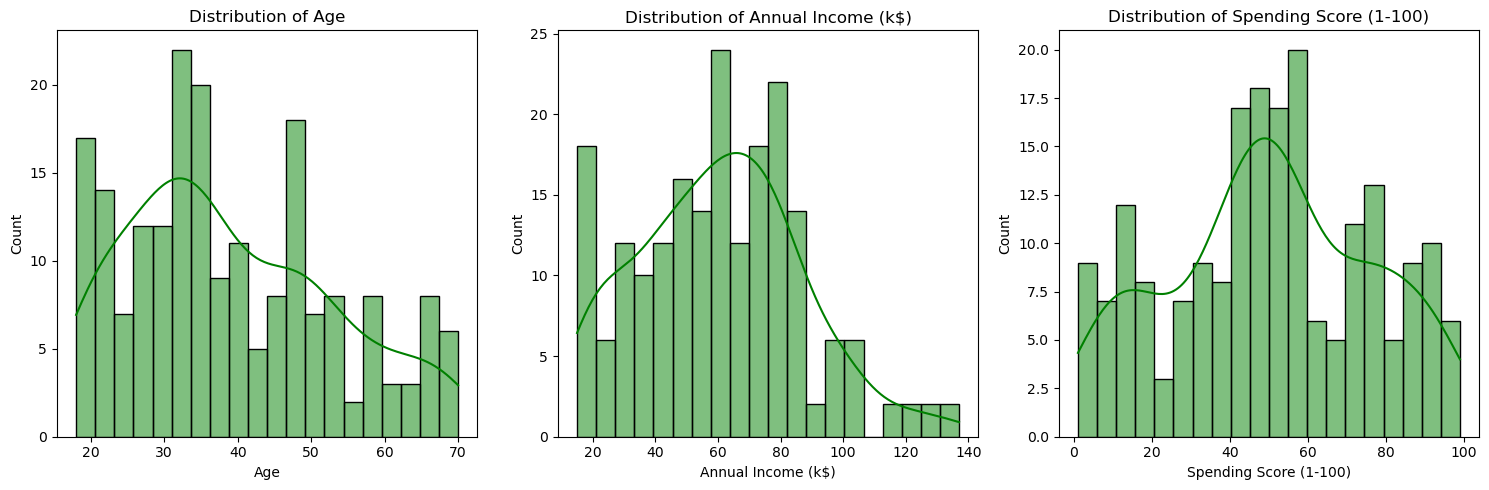

In [14]:
# Plotting Histograms for Age, Annual Income, and Spending Score 
num_cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]

plt.figure(figsize=(15,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,3,i)
    sns.histplot(data[col], kde=True, bins=20, color="green")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

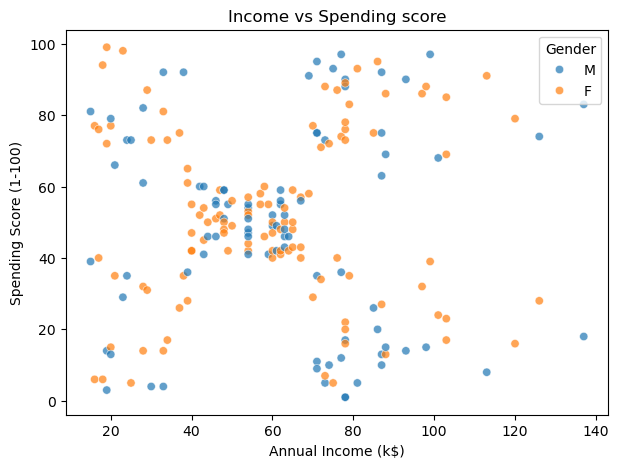

In [16]:
# Plotting Scatterplot for Kmeans clustering in order to understand income and expenditure among males and females
plt.figure(figsize=(7,5))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df,hue="Gender",alpha=0.7)
plt.title("Income vs Spending score")
plt.show()

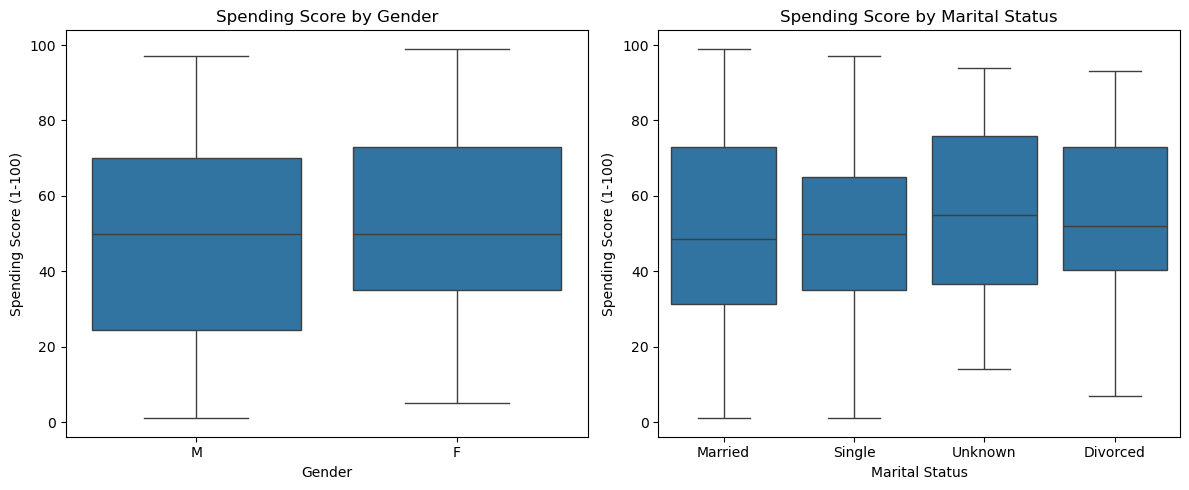

In [17]:
# Boxplot plotting 
plt.figure(figsize=(12,5))

#For Gender and Spending Score
plt.subplot(1,2,1)
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df)
plt.title("Spending Score by Gender")

#Marital Status and Spending Score
plt.subplot(1,2,2)
sns.boxplot(x="Marital Status", y="Spending Score (1-100)", data=df)
plt.title("Spending Score by Marital Status")

plt.tight_layout()
plt.show()

In [20]:
#Scalarizing Age,Income and Spending score for K mean clustering 
Scaler = StandardScaler()
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X_scale = Scaler.fit_transform(X)
print(X_scale[:5])


[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


<h><b> Module 3 : Clustering (K-Means)</h></b>

Used the Elbow Method to determine optimal number of clusters (K = 4).

Applied K-Means to create 4 clusters.

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

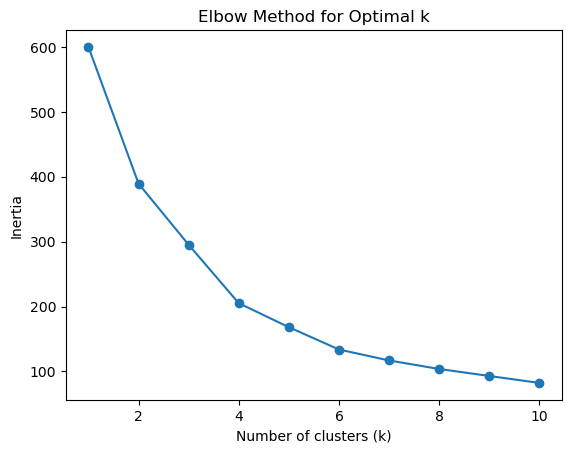

In [26]:
# Using Elbow Method to Find Optimal K value

inertia = []

# Running different values to find optimal K value (k)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scale)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [36]:
# From the Elbow Method, we find that 4 is the best value for K to determine our customer segmentation
# Applying K mean clustering 
kmeans = KMeans(n_clusters=4, random_state=42)
# Fit and predict cluster labels
data["Cluster"] = kmeans.fit_predict(X_scale)

# Check cluster counts
print(data["Cluster"].value_counts())

Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<b>Dimensionality Reduction & Visualization</b>

Used PCA to reduce data to 2D space.

Visualized clusters in scatter plots.

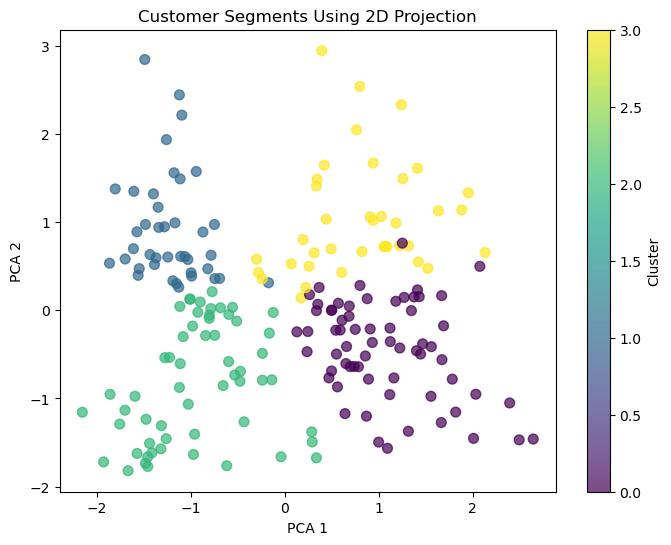

In [38]:
#Importing Library for PCA 
from sklearn.decomposition import PCA

# Reduce to 2 components for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scale)

# Add PCA results into dataframe
data["PCA1"] = X_pca[:, 0]
data["PCA2"] = X_pca[:, 1]

# Scatter plot with clusters
plt.figure(figsize=(8,6))
plt.scatter(data["PCA1"], data["PCA2"], c=data["Cluster"], cmap="viridis", s=50, alpha=0.7)
plt.title("Customer Segments Using 2D Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

<b>Cluster Profiling</b>

Calculated average values of key features per cluster.

In [35]:
#nderstanding the clusters by summarizing 
cluster_summary = data.groupby("Cluster").mean(numeric_only=True)
print(cluster_summary)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         69.415385  0.430769  53.984615           47.707692   
1        161.025000  0.450000  32.875000           86.100000   
2         53.438596  0.403509  25.438596           40.000000   
3        160.552632  0.500000  39.368421           86.500000   

         Spending Score (1-100)  Marital Status_Married  \
Cluster                                                   
0                     39.969231                0.523077   
1                     81.525000                0.600000   
2                     60.298246                0.543860   
3                     19.578947                0.605263   

         Marital Status_Single  Marital Status_Unknown      PCA1      PCA2  
Cluster                                                                     
0                     0.338462                0.107692  1.071288 -0.442251  
1                     0.25000

<b>Result Of Clustering:</b>
<li>0:	Older customers (avg age 54), middle income (~47k), low spending (~40). Value-seeking segment.</li>
<li>1:	Young adults (avg age 33), high income (~86k), very high spending (~82). Premium/high-value group.</li>
<li>2:	Very young (avg age 25), lower income (~40k), but moderately high spending (~60). Trend-driven.</li>
<li>3:	Mid-age (avg age 39), wealthy (~86k), but very low spending (~20). Wealthy but disengaged.</li>

<b>Marketing Strategies</b>

Cluster 0 (Older, mid-income, moderate spenders)
: Offer loyalty programs and value-for-money bundles to encourage consistent purchases.

Cluster 1 (Young, rich, big spenders)
: Focus on premium products, luxury experiences, and VIP programs to maximize revenue.

Cluster 2 (Young, low income, active spenders)
: Engage with affordable, trendy products, student discounts, and social media campaigns.

Cluster 3 (Wealthy, low spenders)
: Use personalized reactivation campaigns, exclusive previews, and luxury sampling to capture attention.